In [6]:
# Import pandas
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Read in dataset
transfusion = pd.read_csv("data/transfusion.data")

# Print out the first rows of our dataset
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [7]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
# Rename target column as 'target' as this is our prediction 
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)


In [5]:
transfusion.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### Print target incidence proportions
Please note this ,it of key importance to detemine how our model will work
<p>The probability of someone donating blood based on this data is so minimal at only 0.23 and probability of one not donaniting is high.
    The model will probability classify 76% that someone will not donate blood.
    
    This dataset is (imbalanced).

In [71]:
# Print target incidence proportions, rounding output to 3 decimal places
transfusion.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

# Feature analysis
<p>Lets dig intoour dataset to understand how each feature relates to our target value</p>
It will help us understand how the model will pick variable for prediction


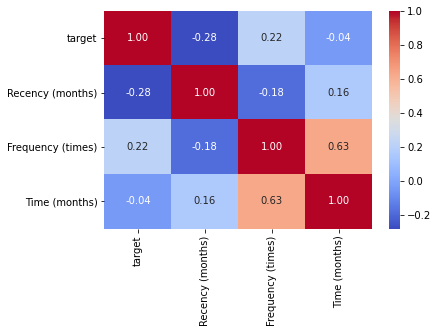

In [33]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(transfusion[["target","Recency (months)","Frequency (times)","Time (months)"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Only Recency (months) seems to have a significant correlation with the target probability.

But this doesn't mean that the other features are not usefull.

###  Lets see how other variables determine if one donates or not


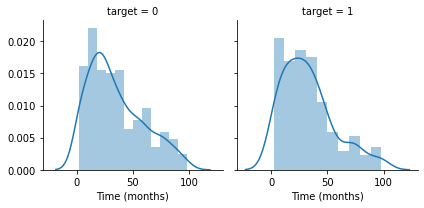

In [34]:
g = sns.FacetGrid(transfusion, col='target')
g = g.map(sns.distplot, "Time (months)")

In [6]:
# g = sns.FacetGrid(transfusion, col='target')
# g = g.map(sns.distplot, "Monetary (c.c. blood)")

Volume donated is also a good feature to know wether the donor will donate or not.People with more pints donated 
Will not likely donate as shown above.
0 has a higher pick

##  Splitting data into train and test datasets
<p>We'll now use <code>train_test_split()</code> method to split <code>transfusion</code> DataFrame.</p>


In [14]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split transfusion DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='target'),
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

# Print out the first 2 rows of X_train
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
334                16                  2                    500             16
99                  5                  7                   1750             26
116                 2                  7                   1750             46
661                16                  2                    500             16
154                 2                  1                    250              2
334    0
99     1
116    1
661    0
154    0
Name: target, dtype: int64
     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
41                  2                  5                   1250             16
682                11                  2                    500             25
532                 4                  8                   2000             28
538                 2                  8                   2000             38
153                 2                  1                   

##  Generate our knn model


In [18]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
# Look at the 2 closest neighbors.
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [19]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Test model score

In [20]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.7165775401069518


##  Our model scored 74% accurate,but we can still tune as below


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7593582887700535


## Model Evaluation using confusion matrix


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)


[[126  17]
 [ 36   8]]


## Model Saving and Exporting
Lets now save our model and use in our flask application


In [67]:
import joblib


In [68]:
# Its important to use binary mode 
joblib.dump(knn, '../Blood-Bank/knnmodel.pkl')


['../Blood-Bank/knnmodel.pkl']

In [70]:
# Import numpy
import numpy as np

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'Frequency (times)'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed
X_train_normed.var().round(3)

Recency (months)              66.929
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
monetary_log                   0.837
dtype: float64